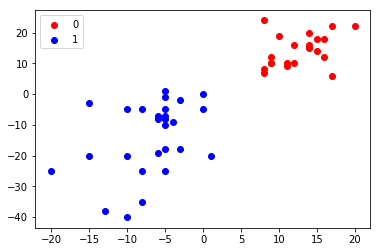

array([[  9.,  10.,  -1.],
       [  8.,   7.,  -1.],
       [  8.,   8.,  -1.],
       [ 11.,   9.,  -1.],
       [ 12.,  10.,  -1.],
       [  9.,  10.,  -1.],
       [ 15.,  14.,  -1.],
       [ 20.,  22.,  -1.],
       [ 11.,  10.,  -1.],
       [  9.,  12.,  -1.],
       [ 10.,  19.,  -1.],
       [ 15.,  18.,  -1.],
       [ 12.,  16.,  -1.],
       [  8.,  24.,  -1.],
       [ 16.,  18.,  -1.],
       [ 14.,  20.,  -1.],
       [ 16.,  12.,  -1.],
       [ 14.,  16.,  -1.],
       [ 14.,  15.,  -1.],
       [ 17.,  22.,  -1.],
       [ 17.,   6.,  -1.],
       [ -1., -28.,   1.],
       [  0.,  -5.,   1.],
       [ -5.,  -8.,   1.],
       [-10., -40.,   1.],
       [ -5., -25.,   1.],
       [ -5.,  -1.,   1.],
       [  1., -20.,   1.],
       [-10.,  -5.,   1.],
       [-15., -20.,   1.],
       [-10., -20.,   1.],
       [ -8.,  -5.,   1.],
       [ -8., -35.,   1.],
       [ -5.,  -7.,   1.],
       [ -6.,  -8.,   1.],
       [-13., -38.,   1.],
       [-15.,  -3.,   1.],
 

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np

#Question 1: Graphing Dataset 

#open the given csv file 
with open('/Users/ash/Downloads/cs111.csv', 'r') as f:
    reader = csv.reader(f)
    raw = list(reader)

#Cleaning the csv file
del(raw[0])
data=np.array(raw)
data=data.astype(np.float)
data[0:21,2]=-1

#Plotting the csv file
plt.scatter(data[0:21,0],data[0:21,1],c='r',label="0")
plt.scatter(data[22:49,0],data[22:49,1],c='b',label="1")
plt.legend(loc='upper left')
plt.show()

data

In [10]:
for i in range(10):
    return(i)

SyntaxError: 'return' outside function (<ipython-input-10-a199ed735bbc>, line 2)

In [5]:
#Question 2 & 3: Implementing Gradient Descent For Three Variables With The Given Error Function 

#Implementing error function (average of loss function in the whole dataset)
def errorf(m1,m2,b): 
    for i in range(50):
        result=0
        x1=data[i,0]
        x2=data[i,1]
        f=m1*x1+m2*x2+b
        y=data[i,2]
        result=result+np.log(1+np.exp(-y*f))
    return(result/50)

#Implementing the partial derivative of the error function with respect to coefficient m1
def pdm1(m1,m2,b): 
    for i in range(50):
        result=0
        x1=data[i,0]
        x2=data[i,1]
        f=m1*x1+m2*x2+b
        y=data[i,2] 
        result=result+((1+np.exp(-y*f))**(-1))*np.exp(-y*f)*(-y)*x1
    return(result/50)

#Implementing the partial derivative of the error function with respect to coefficient m2
def pdm2(m1,m2,b): 
    for i in range(50):
        result=0
        x1=data[i,0]
        x2=data[i,1]
        f=m1*x1+m2*x2+b
        y=data[i,2]
        result=result+((1+np.exp(-y*f))**(-1))*np.exp(-y*f)*(-y)*x2
    return(result/50)

#Implementing the partial derivative of the error function with respect to coefficient b
def pdb(m1,m2,b): 
    for i in range(50):
        result=0
        x1=data[i,0]
        x2=data[i,1]
        f=m1*x1+m2*x2+b
        y=data[i,2] 
        result=result+((1+np.exp(-y*f)))**(-1)*np.exp(-y*f)*(-y)
    return(result/50)

#Initiating the initial values of each coefficient. The choice here is arbitrary because if gradient descent is
#implemented correctly and the error function has just 1 global minimum, these choices do not matter. The step
#is chosen so that it's not too big (that we overshoot) and not too small (to be too computationally costly)
startm1=0
startm2=0
startb=0
step=0.01

#Calculate the value of the error function at the beginning
errorvalue=errorf(startm1,startm2,startb)

#A dummy variable to count the number of iterations
count=0

#A dummy list to keep track of the error value
errorlist=[]

#Implementing gradient descent for 3 variables 
for i in range(3000): 
    currm1=startm1-pdm1(startm1,startm2,startb)*step 
    currm2=startm2-pdm2(startm1,startm2,startb)*step 
    currb=startb-pdb(startm1,startm2,startb)*step
    errorvalue=errorf(startm1,startm2,startb)
    errorlist.append(errorvalue)
    startm1=currm1
    startm2=currm2
    startb=currb
    count+=1

print("(m1 m2 b)=",currm1,currm2,currb)
print("Iteration number:",count)

(m1 m2 b)= -0.0547142762811 -0.437714210249 0.0547142762811
Iteration number: 3000


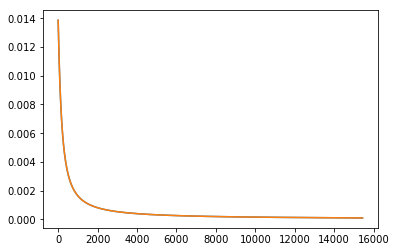

In [300]:
#Plotting the error value over number of iteration: 
x=range(count)
plt.plot(x,errorlist)
plt.show()

#As we can see, the error decrease over time. The less the error is, the less it decrease (because it gets closer and 
#closer to the minimum). If we choose a bigger step, it would probably decrease faster but then we will risk overshoot

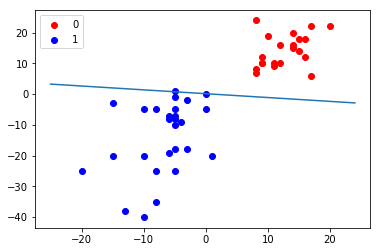

In [4]:
#Plotting the classifier
plt.scatter(data[0:21,0],data[0:21,1],c='r',label="0")
plt.scatter(data[22:49,0],data[22:49,1],c='b',label="1")
x=range(-25,25 )
abline_values = [-currm1/currm2 * i - currb/currm2 for i in x]
plt.plot(x, abline_values)
plt.legend(loc='upper left')
plt.show()

Question 4: Interpretation Of The Loss Function

The loss function is a clever use of mathematical function to implement gradient descent when we need to make a classifier. If the classification is correct then the function f(x_i)=m_1*x_1+m_2*x_2+b will always be of the same sign as y_i (either 1 or -1) or (-y_i*f(x_i)) will always be negative, thus the exponent e^(-y_i*f(x_i)) will be small and therefore the loss function will be small. If the classification is incorrect then f(x_i) and y_i will be of opposite signs, therefore the exponent e^(-y_i*f(x_i)) will be large and the loss function will also be large. Because of this implementation of loss function, we can take the gradient of it and nudge the values of the coefficients to get the error function smaller and smaller every step (therefore making the classifier more and more correct). 

Question 5: Dataset that cannot be effectively classified using the implemented algorithm

There are two types of data that won't be effectively classified using this algorithm: 
    - Data in which a single variable is described with more than 2 coordinates, that is, data that dependent on more than 2 variables. For example, data that depends on 3 variables like x_1, x_2, x_3 will need a classifier that implements gradient descent for 4 variables. 
    - Data in which there are more than 2 "bundles", that is, data that is classifed in the learning dataset with more than 2 types. For example, data that is classified into 3 types "a", "b", "c" in the learning set will not be effectively classified by this algorithm (since we will need more than 1 line to separate the plane into 3 regions) 
    
Question 6: SVM For Spams Classifier

Maybe we can use this type of classifier to look for spams by assigning different variables that is typical for spams: 
    - Frequency of certain words: there are some words that spams usually have, like "good deal", "free sample" or "click on this link",etc. If we have a set of classfied spam, we can roughly estimate the average frequency of these indicating words and make it a variable in our classfier
    - Misspelling: important emails tend not to be misspelled, so if the number of misspelled words get over a certain limit we can classify an email as a spam. Again, we can also make this a variable for our classifier 
    - Sender: we can check the sender email to see if it's in our contact list, if it's not then it's likely to be spam. However, sometimes new people send us email too, so we can put weighting on this variable to make sure we don't consider it too important in our classifying process. 

All of the above criterias can be implemented as variables (just like x_1 and x_2 in our original algorithm), and then use the same process of gradient descent to find a hyperplane to separate the spam and the non-spam. We can do this because we only have two types of email: either spam or not-spam, so we won't have to use more than 1 hyperplane. We can also use this along with a Bayes theorem algorithm that returns the possibility of one email is a spam based on previous learnt data. 
